# 04: Findings and Technical Report

In this notebook, I will share my technical findings, explain my goals, describe modeling choices, evaluate model performance, and discuss results.  
  
---

# Executive Summary

## Findings from Data Analysis: Summary  

Our data revealed unexpected and useful findings about fatal traffic collisions in San Francisco from 2014-2015.  
  
- **Pedestrians, people inside vehicles, motorcycle passengers, and bicyclists** are the top 4 most at-risk types of victims in a fatal traffic collision in San Francisco from 2014-2025.
- **Pedestrians** are by far the most common victim type of the top 4.
- There is an **upward trend in pedestrian deaths by traffic collisions,** while vehicle, motorcycle, and bicycle collisions show no consistent upward or downward trend.
- **One AM and 12 PM are the most dangerous traffic hours** with the highest number of traffic fatalities, while **4 AM has the least fatalities.**
- **Morning is overall the most dangerous time of the day**, followed by evening, then afternoon from most to least number of fatal collisions.
- **Male victims account for 2.4x the number of female victims in fatal traffic collisions.** This strong imbalance in sex suggests that this is a feature that may have strong predictive power.
- There is a **significant correlation between collision type and time of day.** (p-value < 0.05)
- There are **significant differences in age across collision categories.** (p-value = 0)

We have more than enough findings from our analysis to engineer features that will be relevant to developing an ML model.

## ML Model to Predict Whether a Victim of a Fatal Traffic Collision Is a Pedestrian

With this data and features, I chose to build a **binary classification model** using a **Gradient Boosting Classifier** to predict whether a victim who dies from a traffic collision in San Francisco is a pedestrian.

Of all the models I could have built, this model is an approach to traffic fatality risk classification that balances predictive power with interpretability. The gradient boosting classifier with the selected features and preprocessing steps is well-suited to capturing the complex patterns in traffic fatality data. The evaluation metrics chosen appropriately reflect the dual priorities of avoiding false alarms while ensuring high-risk areas are identified.  

## Model Metrics and Score  

- **Accuracy:** 95.52% on the test set
- **Precision:** 100% (all predicted pedestrian fatalities were correct)
- **Recall:** 92.11% (the model identified 92.11% of all actual pedestrian fatalities)
- **F1 Score:** 95.89% (harmonic mean of precision and recall)
- **AUC:** 99.09% (excellent discriminative ability)
- **Cross-Validation Accuracy:** 97.59% ± 1.53% (consistent performance across different data splits)

### Confusion Matrix  

- True Negatives: 29 (correctly identified non-pedestrian fatalities)
- False Negatives: 3 (pedestrian fatalities incorrectly classified as non-pedestrian)
- True Positives: 35 (correctly identified pedestrian fatalities)
- False Positives: 0 (no non-pedestrian fatalities incorrectly classified as pedestrian)
  
---

# Findings from Exploring and Analyzing our Data in Further Depth

### Collision Categories  
  
- Pedestrian fatalities are the most common (58%)
- Vehicle fatalities (22%)
- Motorcycle fatalities (13%)
- Bicycle fatalities (7%)
  
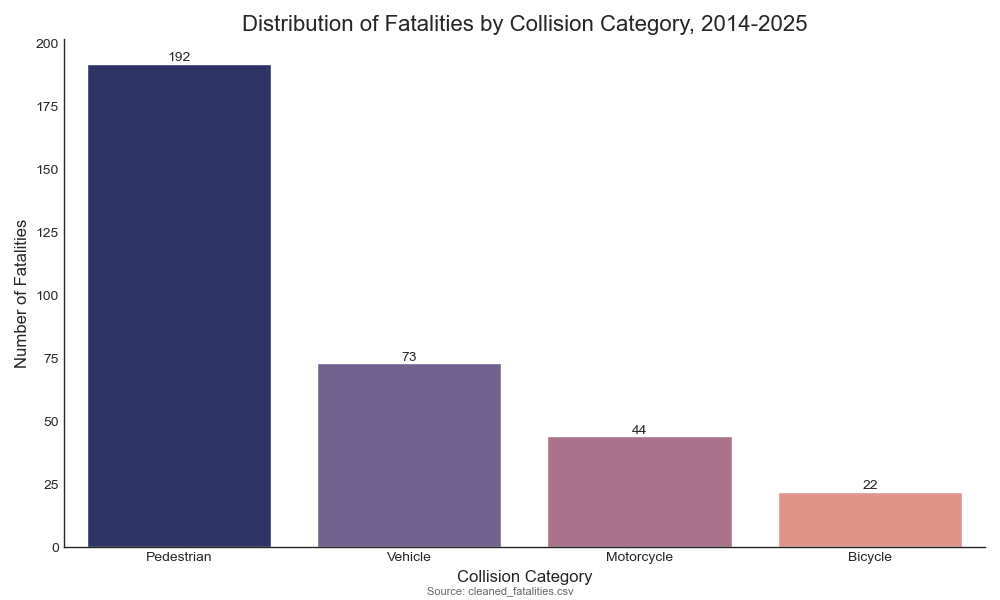

### Temporal Patterns  
  
- Yearly Distribution: Fatal collisions range from 20-42 per year, with 2024 showing the highest count (42)
- Monthly Distribution: March has the highest fatalities (37), while April has the lowest (16)
- Day of Week: Saturday has the most fatalities (58), followed by Tuesday (52)
- Time of Day: Peaks at 1 AM and 12 PM (21 each), with the fewest accidents in early morning hours (4 AM)

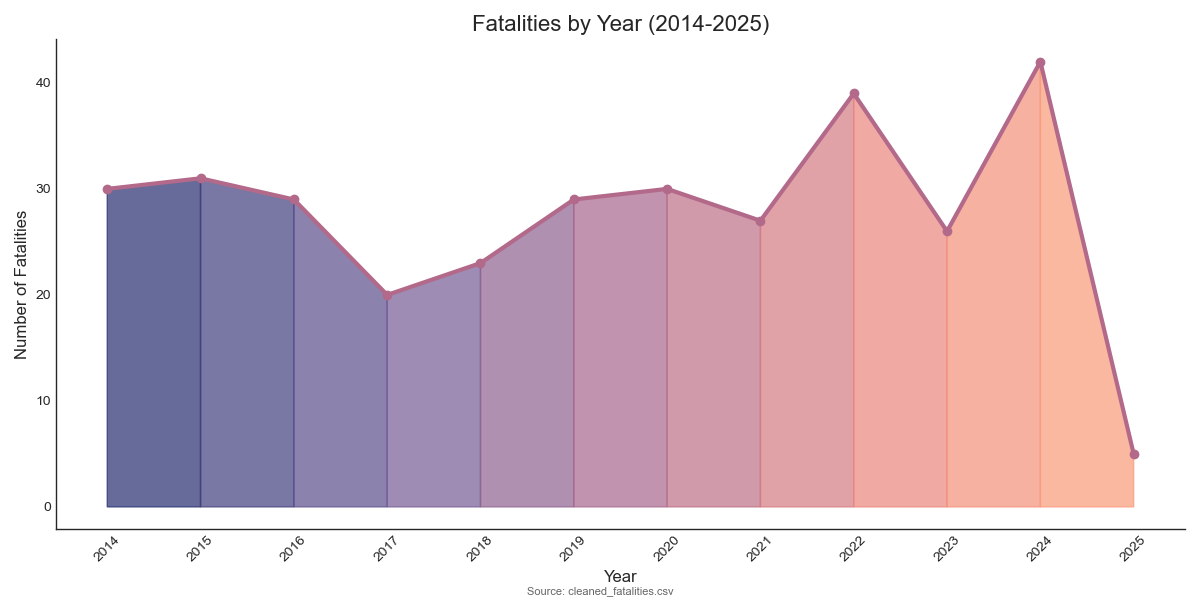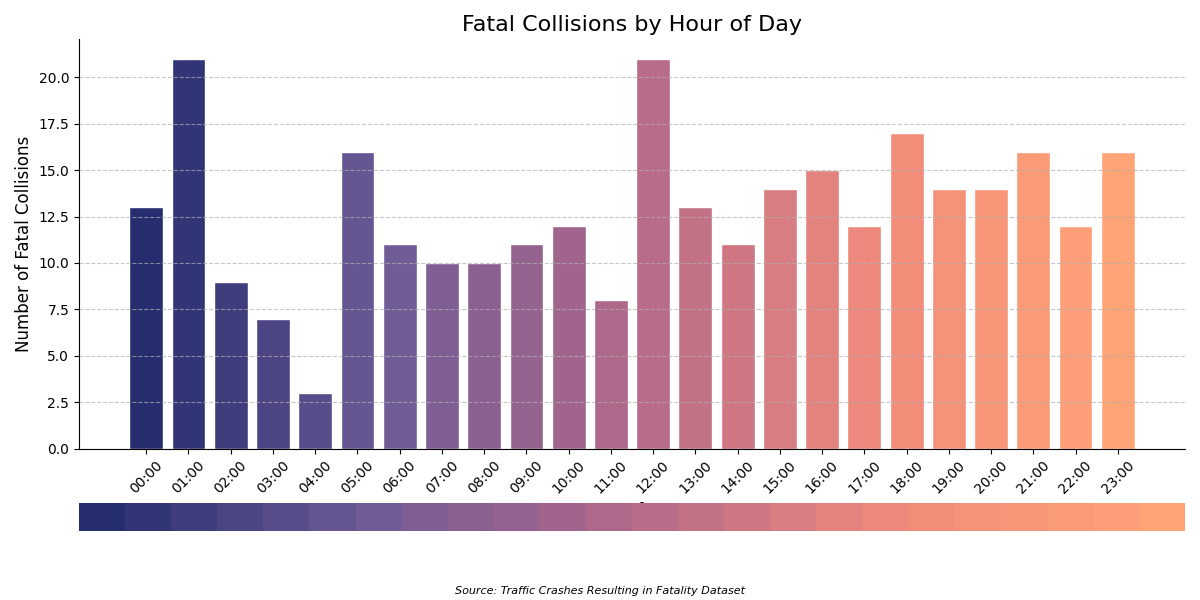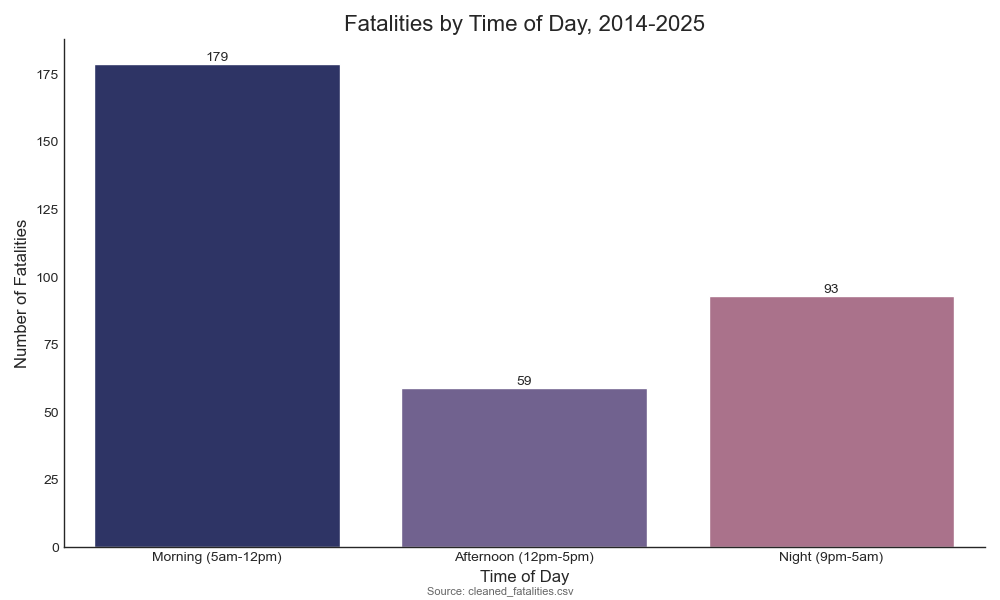

### Demographic Patterns

- Age distribution varies significantly by collision category
- Pedestrian fatalities tend to involve older victims (mean age 58)
- Motorcycle and vehicle fatalities tend to involve younger victims (mean ages 41 and 42)
- Males account for 71% of fatalities

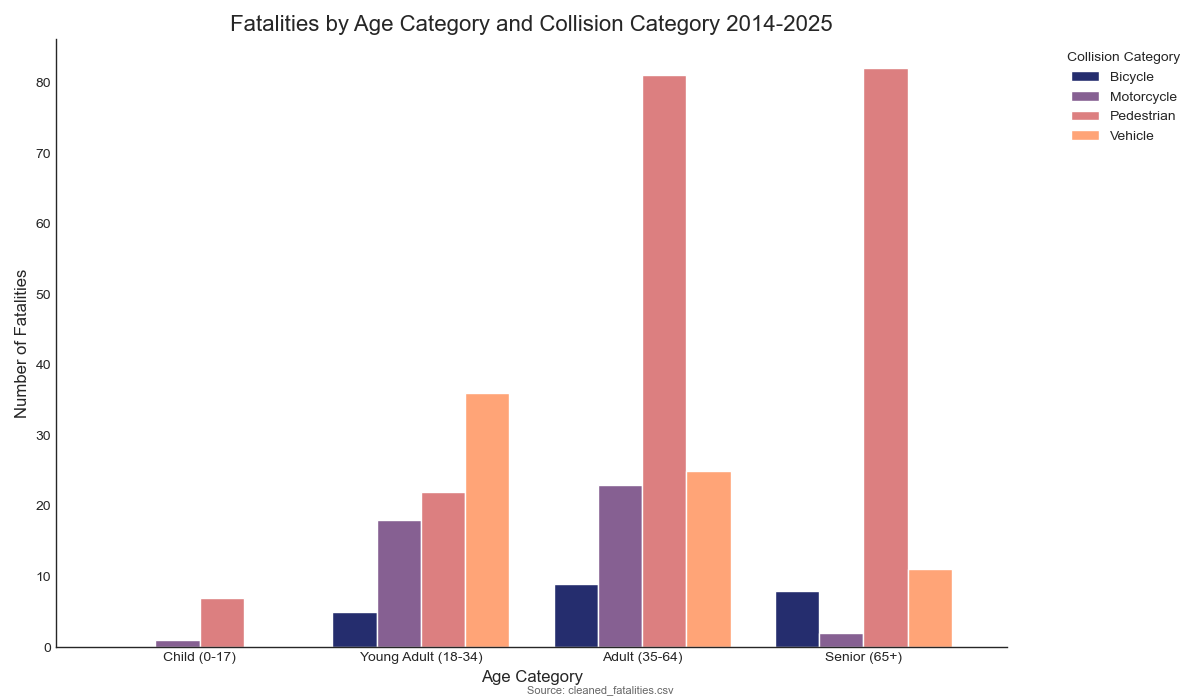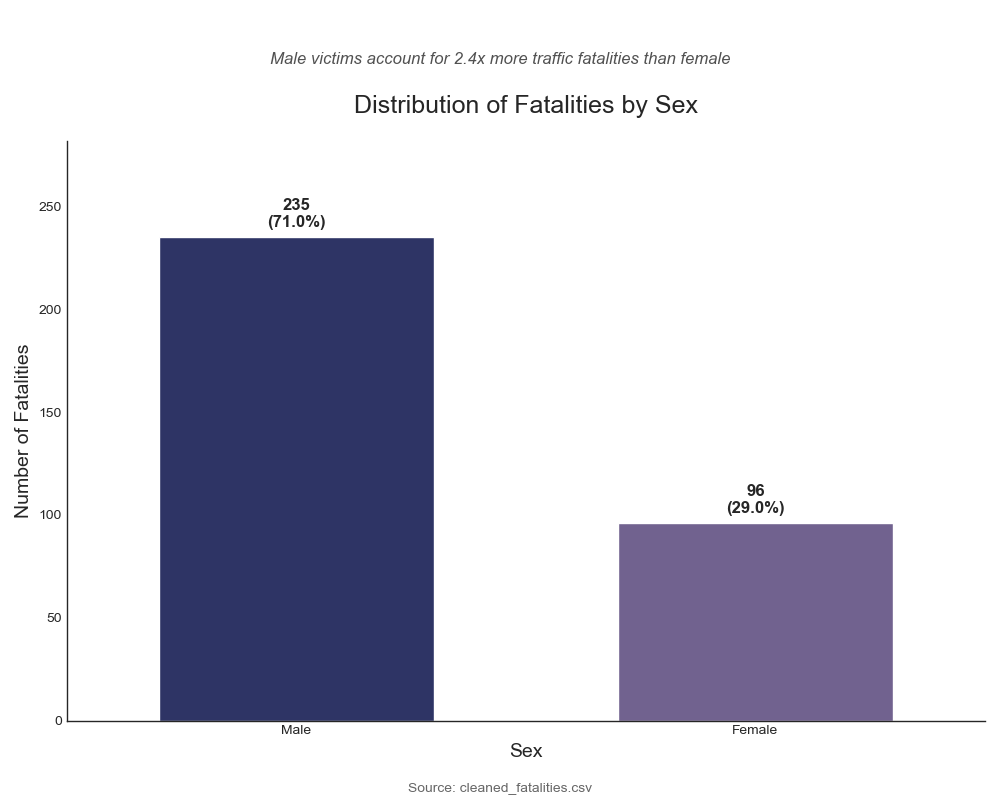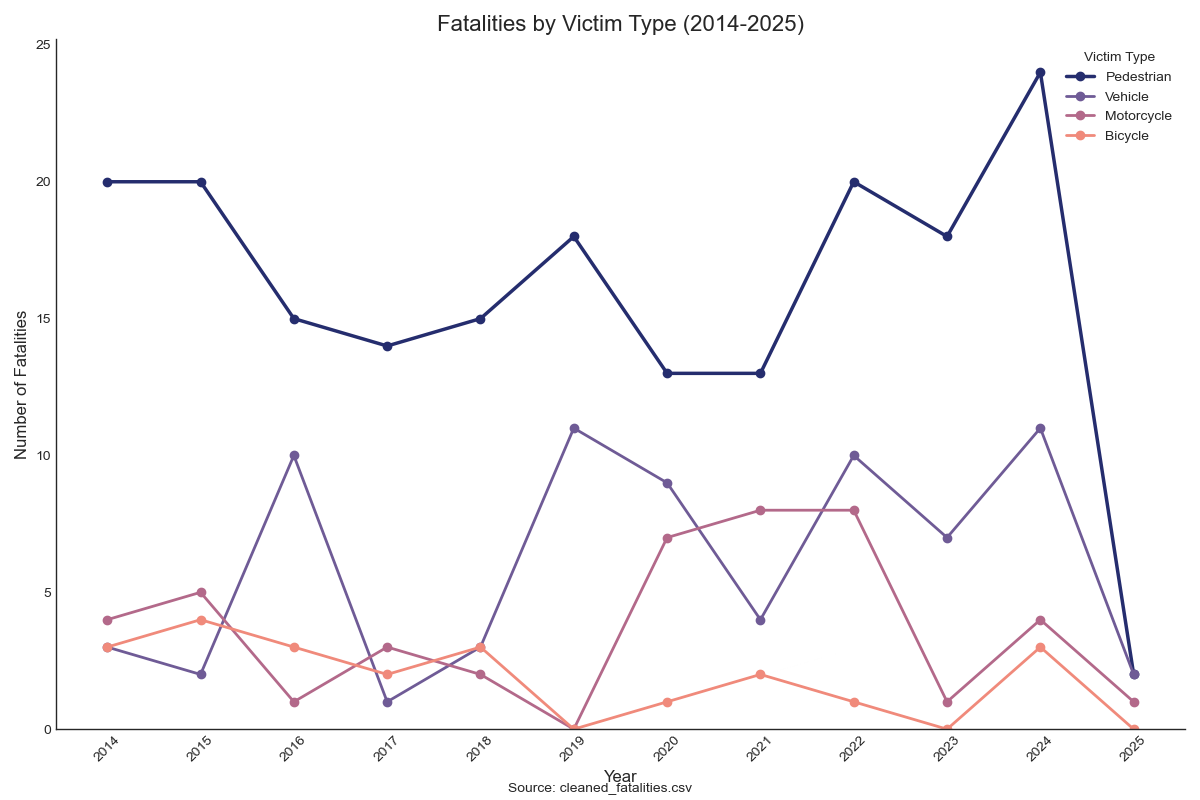

### Geographic Distribution  

- Fatalities are clustered in specific areas
- Latitude range: 37.71-37.82
- Longitude range: -122.51 to -122.37

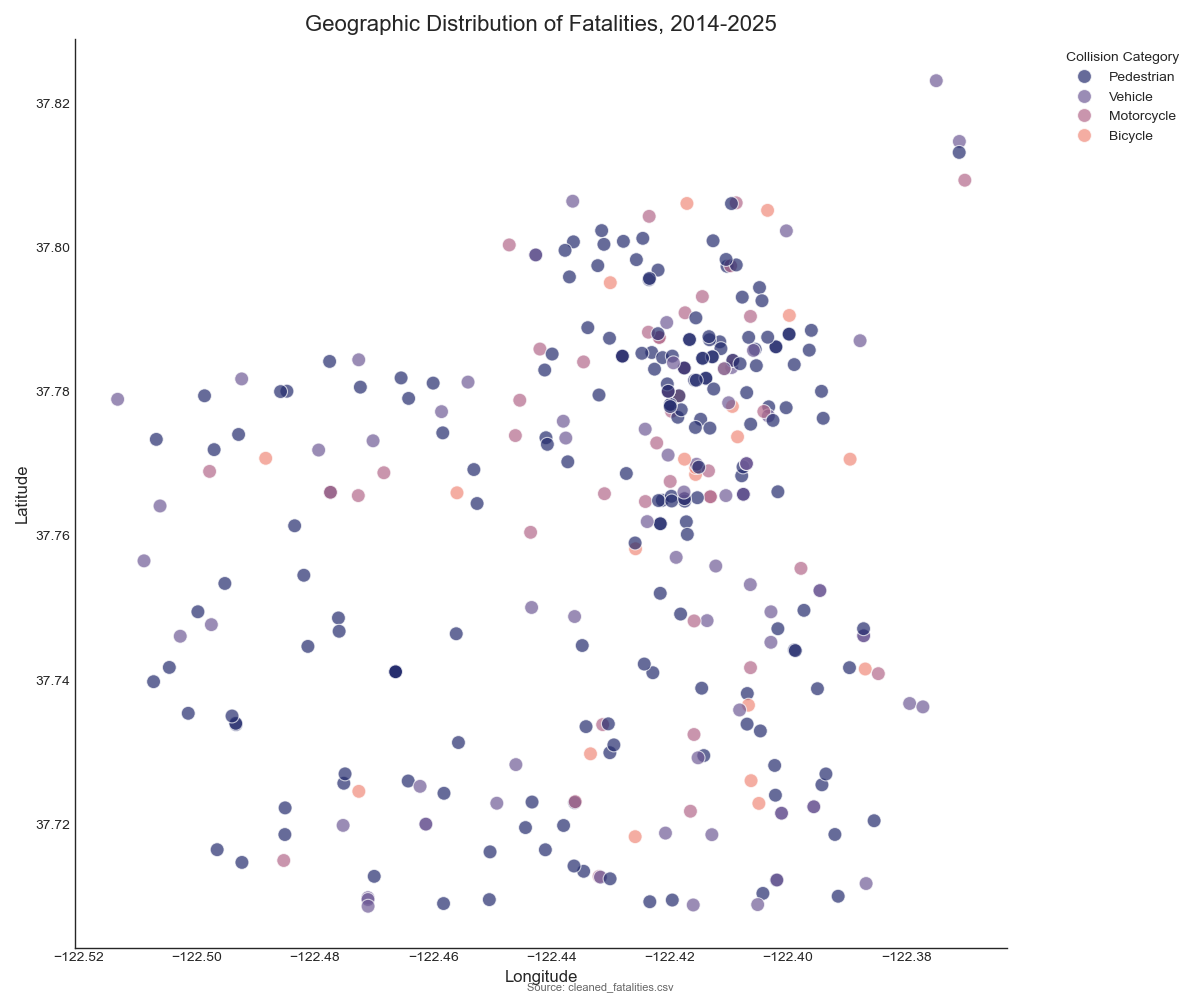

---

# Model Purpose and Functionality  

This model is designed to predict whether the fatal victim of a traffic collision in San Francisco, CA, is a pedestrian.  
  
## Key Features and Techniques  
### Data Preparation and Feature Engineering  
  
The most important features for predicting pedestrian fatalities were:  
  
1. Collision type: "Pedestrian vs Motor Vehicle" was by far the most important feature (77.7% importance)
2. Collision type: "Motor Vehicle & Pedestrian" (4.3% importance)
3. Collision type: "Pedestrian vs Motorcycle" (4.1% importance)
4. Age of the victim (4.0% importance)
5. Collision type: "Pedestrian vs LRV" (3.4% importance)
  
## Feature Selection  
  
The model uses a combination of:

- Spatial features: analysis_neighborhood
- Temporal features: time_of_day
- Categorical features: age_category, collision_type, sex  
  
## Preprocessing Pipeline  
  
- StandardScaler for numerical features: Normalizes numerical data to improve model performance
- OneHotEncoder for categorical features: Transforms categorical variables into a format suitable for ML algorithms
- ColumnTransformer: Combines these preprocessing steps into a unified pipeline  
  
## Model Training and Evaluation
  
- Train-test split: 80/20 split with stratification to maintain class balance
- Pipeline architecture: Ensures preprocessing and model training are consistently applied
- Classification metrics: Uses classification report (precision, recall, F1-score) for model evaluation
- ROC-AUC score: Evaluates the model's ability to discriminate between classes

## Explainability  
  
- Feature importance visualization: To show which features have the strongest predictive power

---

# Why This Model and Approach?
## Strengths of Gradient Boosting for This Problem

- Handles complex relationships: Gradient boosting can capture non-linear relationships between features and target variables, which is crucial for modeling complex traffic patterns.

- Feature importance: Naturally provides insights into which features are most predictive of fatality risk.

- Robust to outliers: Gradient boosting is less affected by outliers than many other algorithms, important for geospatial data that may contain anomalies.

- Good performance with mixed data types: Works well with both categorical and numerical data after appropriate preprocessing.

- Handles imbalanced data well: Can learn effectively even when one class (high-risk or low-risk) is more frequent in the dataset.

## Why This Feature Set?

The selected features combine important dimensions that influence traffic fatality risk:

- Spatial components (neighborhood analysis): Location is critical for understanding risk patterns for pedestrians across different areas of the city.

- Temporal patterns (time of day): Fatalities often follow patterns based on time of day.

- Road user type (collision_category): Different road users (pedestrians, cyclists, vehicle occupants) face different risks.

- Sex classification: Explicitly including this feature helps the model understand the significant risk differences between male and female sexes.

---


# Alternative Models Not Chosen
## Logistic Regression
  
While simpler to interpret, logistic regression would likely miss complex non-linear relationships and interactions between features in traffic fatality data. The spatial and temporal factors often have complex interrelationships that gradient boosting can better capture.
  
## Neural Networks
  
Would require more data to perform well, add significant complexity, be more prone to overfitting with this dataset size, and provide less inherent interpretability (important for traffic safety analysis where understanding risk factors is crucial).
  
## Random Forest
  
While similar to gradient boosting, gradient boosting often provides better performance through sequential improvement of weak learners. For risk classification, the incremental learning approach of gradient boosting typically yields better predictive power.
  
## Support Vector Machines
  
Would struggle with the mixed feature types and might require more extensive feature engineering. Also less directly interpretable than tree-based methods.
  
## K-Nearest Neighbors
  
Would be heavily influenced by the geography alone and less able to capture temporal patterns effectively. Also doesn't scale well to larger datasets.  

---

# Evaluation Metrics Used
  
The model uses multiple evaluation approaches:
## 1. Classification Report (Precision, Recall, F1-Score)

- Precision: Measures how many predicted high-risk areas are actually high-risk.
- Recall: Measures how many actual high-risk areas were correctly identified.
- F1-Score: Harmonic mean of precision and recall, balancing both concerns.
  
These were chosen because in traffic safety, both false positives and false negatives have real consequences. A balanced approach is needed to:  
  
- Avoid unnecessarily alarming about safe areas (precision)
- Ensure we don't miss areas that truly need intervention (recall)

## 2. ROC-AUC Score  
  
This measures the model's ability to discriminate between high and low-risk cases across various threshold settings. I chose this because:  
  
- It's threshold-independent, allowing evaluation of the model's performance regardless of where the classification cutoff is set
- It's particularly useful for imbalanced datasets where one class might be more prevalent
- It gives an overall performance assessment that balances true positive rate against false positive rate 

---